<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

In [1]:
#librerias
import pandas as pd
import numpy as np
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#carga de datos
games_df = pd.read_csv('/datasets/games.csv')

In [3]:
#analisis general de los datos
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games_df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11088,Scrabble,PSP,2009.0,Misc,0.08,0.00,0.00,0.01,NaN,tbd,E
13667,Nitroplus Blasterz: Heroines Infinite Duel,PS4,2015.0,Fighting,0.01,0.00,0.02,0.00,70.0,6.9,T
10250,Nicktoons: Unite!,DS,2006.0,Adventure,0.10,0.00,0.00,0.01,NaN,NaN,NaN
13016,Hunted: The Demon's Forge,PC,2011.0,Action,0.03,0.01,0.00,0.00,61.0,6.6,M
10777,Shovel Knight,WiiU,2015.0,Platform,0.05,0.04,0.00,0.01,88.0,8.3,E
8130,FIFA Soccer 2002,GC,2001.0,Sports,0.14,0.04,0.00,0.00,81.0,8,E
5615,FIFA 2001 Major League Soccer,PS,2000.0,Sports,0.18,0.12,0.00,0.02,85.0,7.8,E
8750,Dynasty Warriors 8,X360,2013.0,Action,0.09,0.05,0.00,0.01,65.0,7.5,T
3125,Meccha! Taiko no Tatsujin Master DS: 7-tsu no ...,DS,2008.0,Misc,0.00,0.00,0.65,0.00,NaN,NaN,NaN
15302,Kuon,PS2,2004.0,Adventure,0.01,0.01,0.00,0.00,57.0,7.7,M


In [5]:
#cambiar titulos de columnas a minusculas para facilitar y evitar errores al llamar a la columna
games_df.columns = games_df.columns.str.lower()

In [6]:
#En las criticas si teniamos NaN y tbd se rellenara con el valor con el otro critico y de no tener ninguno de las dos criticas sera 999 para identificar facilmente
games_df['user_score'] = games_df['user_score'].replace('tbd', np.nan)
games_df['user_score'] = games_df['user_score'].fillna(games_df['critic_score']/10)
games_df['user_score'] = games_df['user_score'].astype(float)

games_df['user_score'] = games_df['user_score'].replace('tbd', np.nan)
games_df['critic_score'] = games_df['critic_score'].fillna(games_df['user_score']*10)

games_df['critic_score'] = games_df['critic_score'].fillna(999)
games_df['user_score'] = games_df['user_score'].fillna(999)

In [7]:
#en rating se cambiaran los valores NaN a tbd la cantidad de datos ausentes es demaciada para eliminarla y no es posible determinar un valor
games_df['rating'] = games_df['rating'].fillna('tbd')

In [8]:
#Los valores nulos restantes son minimos (2% de los datos totales aprox) y se presentan en columnas importantes para la evaluacion de los datos como año y nombre y genero 
#por lo cual considero que es valido eliminarlos por completo
games_df = games_df.dropna()

In [9]:
#no deberia afectar el cambio del formato pero por estetica
games_df['year_of_release']=games_df['year_of_release'].astype(int)

In [10]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [11]:
#Ventas totales: sumatoria de todas las ventas
games_df['total_sales'] = games_df['na_sales']+games_df['eu_sales']+games_df['jp_sales']+games_df['other_sales']

In [12]:
games_df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
12750,Kamen Rider Kabuto,PS2,2006,Action,0.00,0.00,0.06,0.00,999.0,999.0,tbd,0.06
10905,Bleach: Heat the Soul,PSP,2005,Fighting,0.00,0.00,0.09,0.00,999.0,999.0,tbd,0.09
1804,Derby Stallion 99,PS,1999,Sports,0.00,0.00,1.06,0.07,999.0,999.0,tbd,1.13
9996,Karaoke Revolution Presents American Idol Enco...,PS3,2008,Misc,0.11,0.00,0.00,0.01,999.0,999.0,E10+,0.12
9983,NHL 2K3,XB,2002,Sports,0.09,0.02,0.00,0.00,89.0,7.1,E,0.11
6948,Disney's A Christmas Carol,DS,2009,Adventure,0.21,0.01,0.00,0.02,66.0,6.5,E,0.24
8020,Casper: Friends Around the World,PS,2000,Action,0.10,0.07,0.00,0.01,999.0,999.0,tbd,0.18
3262,NFL Quarterback Club 99,N64,1998,Sports,0.59,0.02,0.00,0.00,999.0,999.0,tbd,0.61
12086,Petz: Hamsterz Bunch,PSP,2009,Simulation,0.06,0.00,0.00,0.01,999.0,999.0,E,0.07
5530,Teen Titans,GC,2006,Action,0.25,0.07,0.00,0.01,63.0,6.9,E10+,0.33


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Hiciste un buen trabajo al cambiar los nombres de las columnas, sus tipos de datos y reemplazar los valores ausentes
</div>


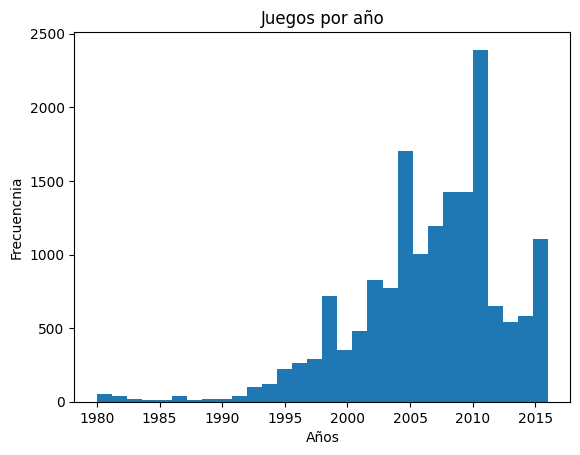

In [13]:
#juegos lanzados por año
plt.hist(games_df['year_of_release'],bins=30)
plt.title('Juegos por año')
plt.xlabel('Años')
plt.ylabel('Frecuencnia')
plt.show()

desde 1990 se presento un tendencia a lanzar videojuegos hasta el 2010 donde los lanzamienos de videojuegos se reducieron considerablemente, se carecen datos para decirlo con certeza pero por la tendencia se podria decir que comienza e elevar el numero de lanzamientos de nuevo, con el analisis posterior donde desglozamos cada plataforma podemos observar que alrededor del periodo es donde salio al mercado nuevas plataformas por lo cual se puede deber a que dejan de haber lanzamientos nuevos para plataformas viejas y las plataformas nuevas traen consigo nuevos juegos para estas plataformas sin embargo pocos al incio, basicamente podria referirse a un periodo de transicion donde entran y salen plataformas del mercado

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de presentar los datos, podemos ver claramente la tendencia de los videojuegos con un incremento constante en años anteriores que ha empezado a ir en declive en los últimos años
</div>


In [14]:
#ventas totales por consola
platform_sales = games_df.groupby('platform')['total_sales'].sum().reset_index()
platform_sales.sort_values(by='total_sales',ascending=False)

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


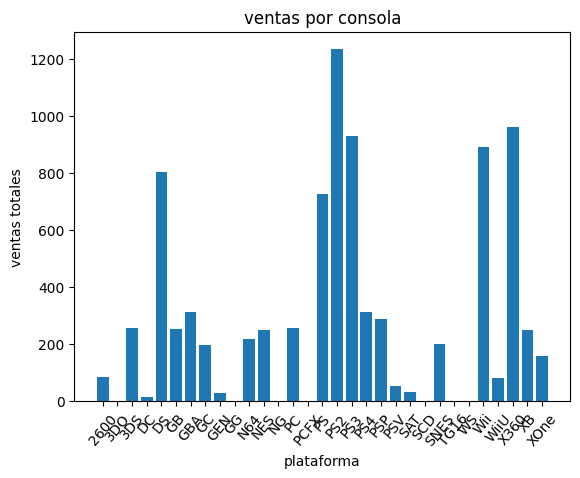

In [15]:
plt.bar(platform_sales['platform'],platform_sales['total_sales'])
plt.xlabel('plataforma')
plt.ylabel('ventas totales')
plt.title('ventas por consola')
plt.xticks(rotation=50)
plt.show()

La PS2,X360,PS3,WII,DS y PS fueron las 6 consolas con mas ventas, la PS2 es la consola con mayor ventas de 1233.56 millones de dolares, las otras consolas mencionadas cuentan con ventas entre 961.24 y 727.58 millones, mientras que las demas consolas se enuenctran debajo de los 314.14 millones

In [16]:
#ventas por consola y año
platform_sales_year = games_df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
#años de los datos
year=platform_sales_year.groupby('year_of_release')['total_sales'].sum().reset_index()

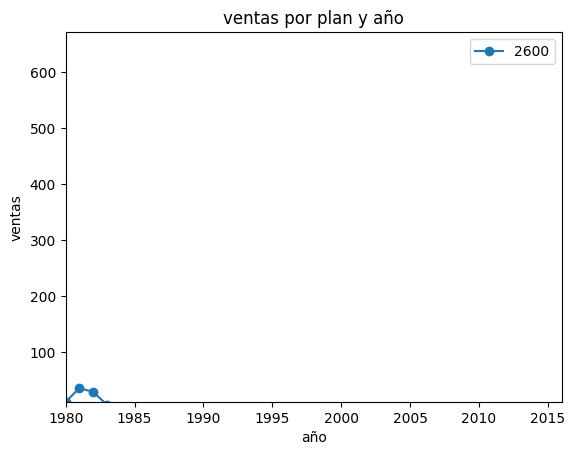

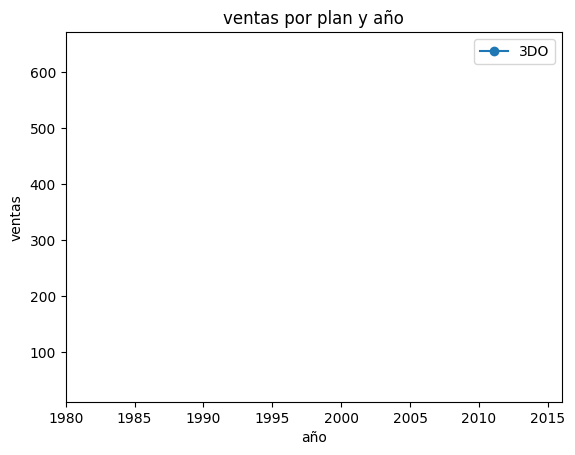

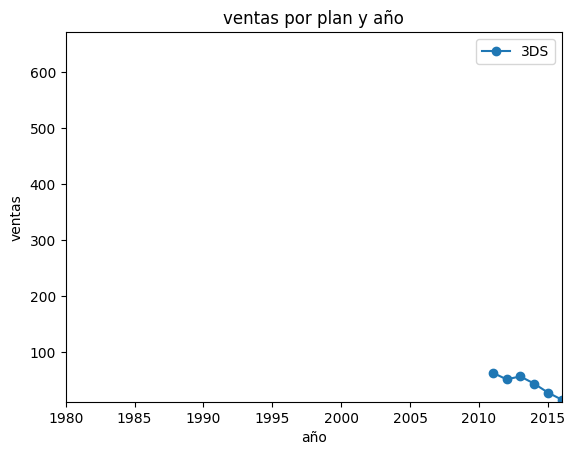

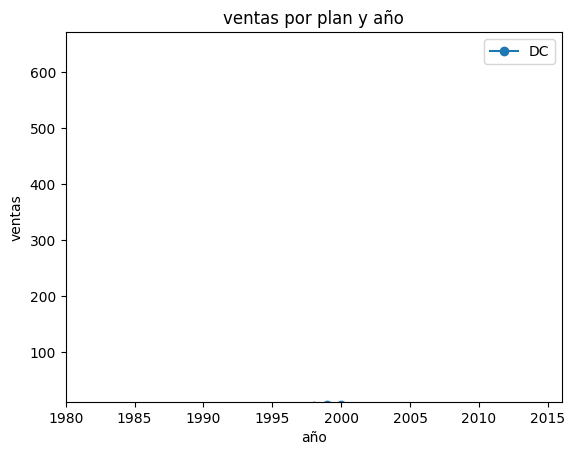

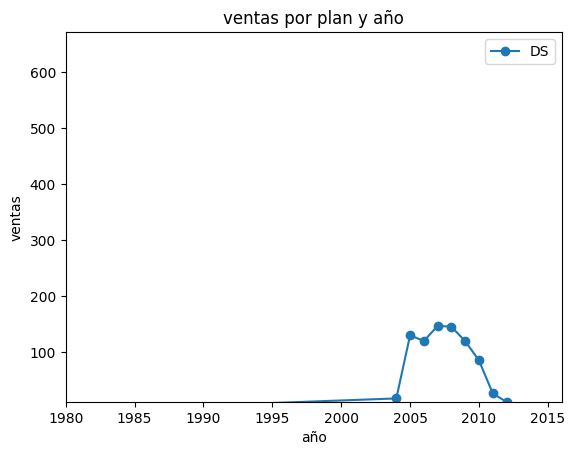

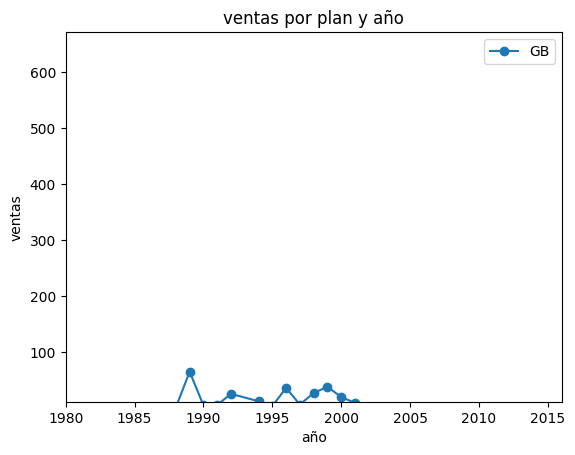

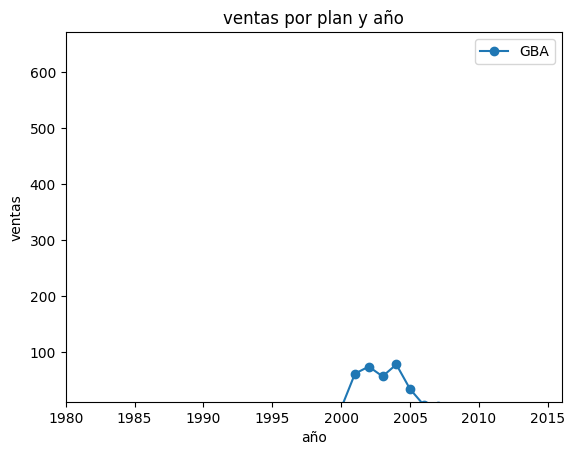

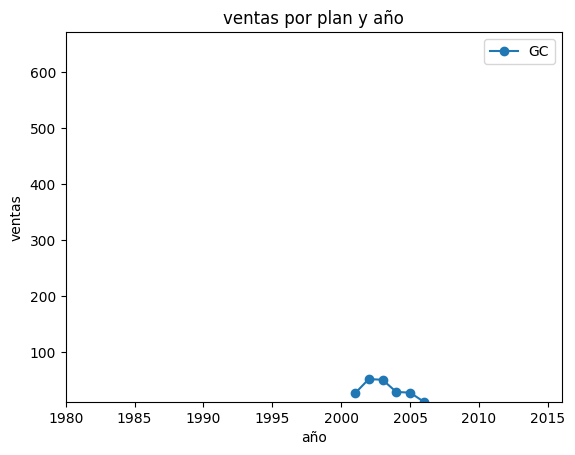

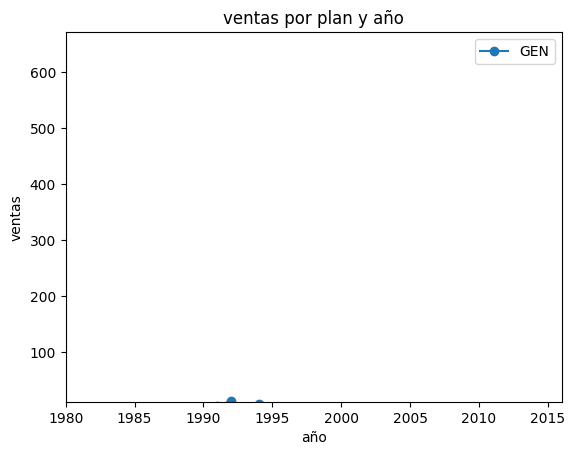

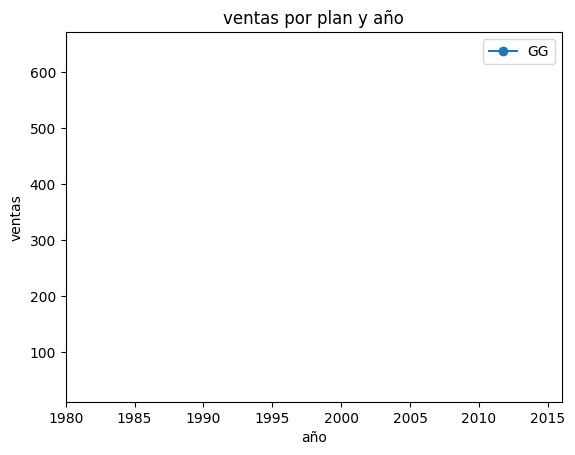

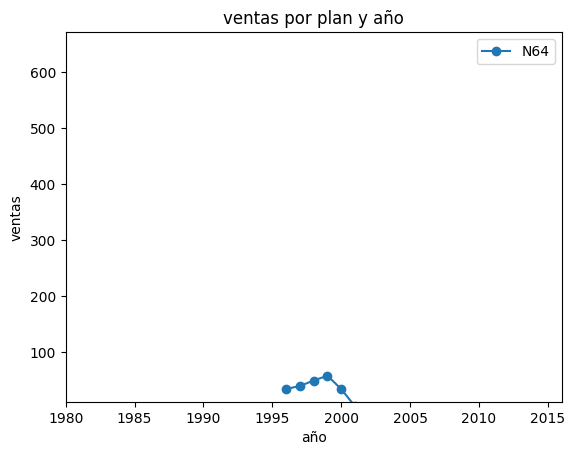

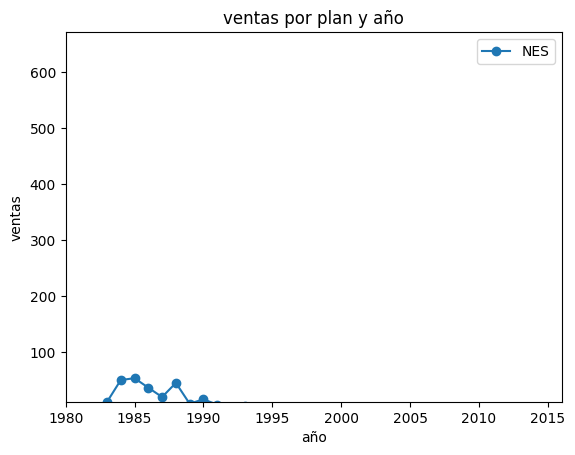

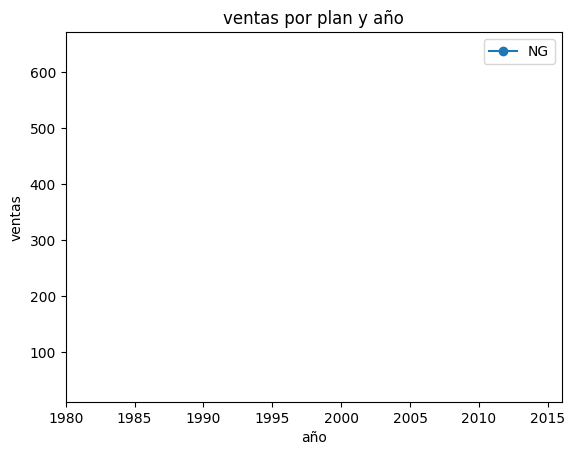

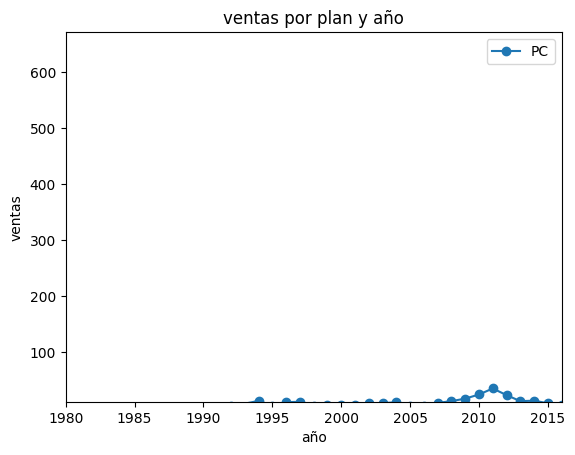

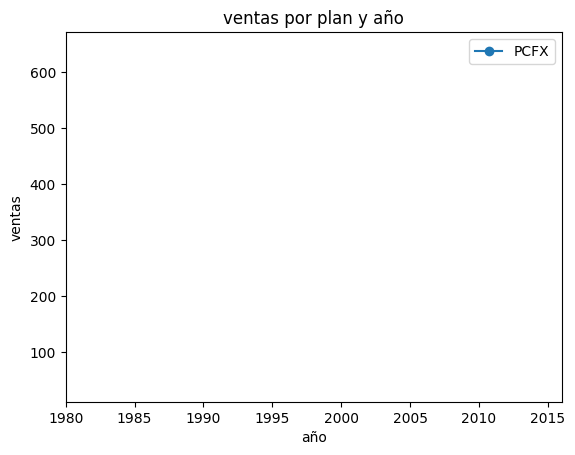

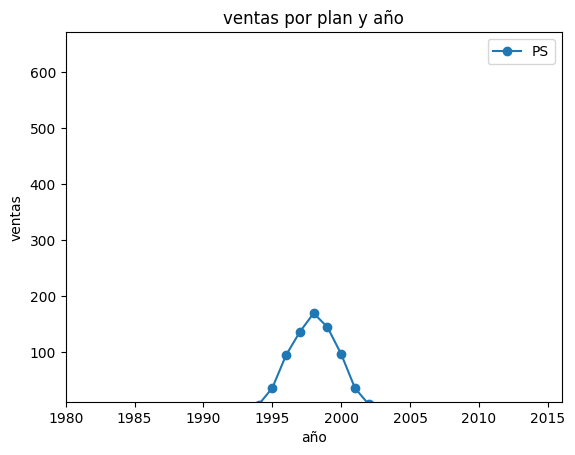

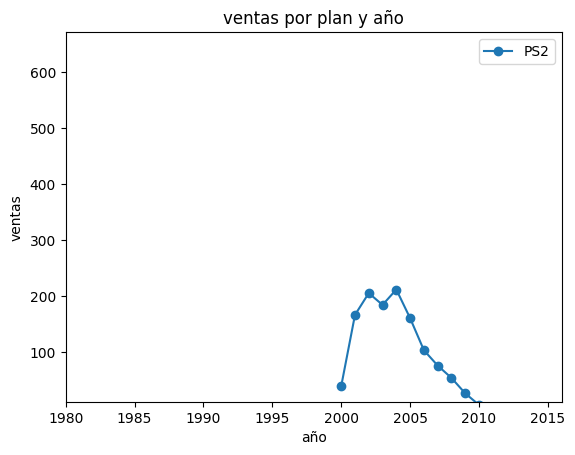

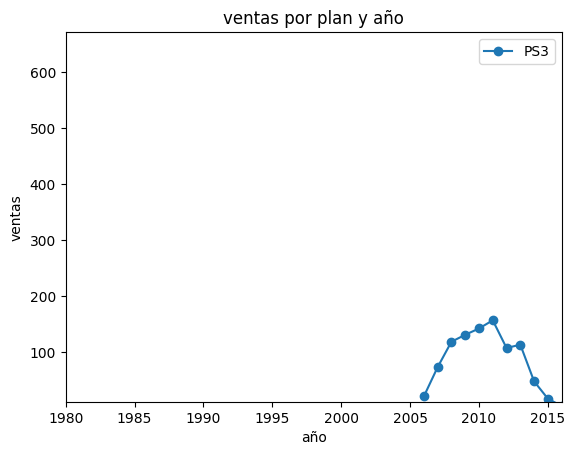

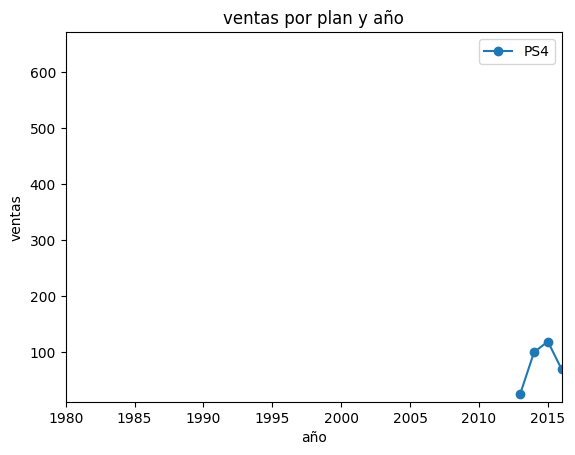

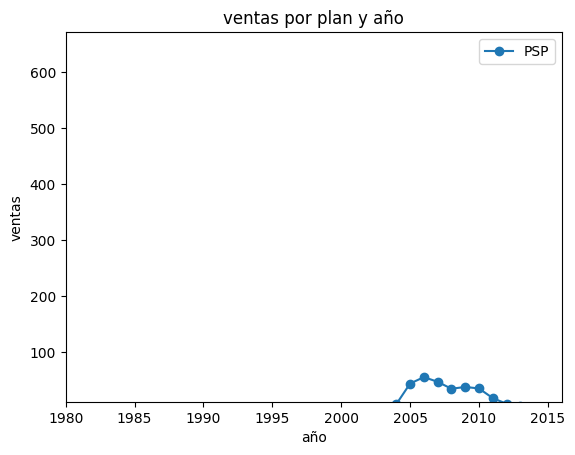

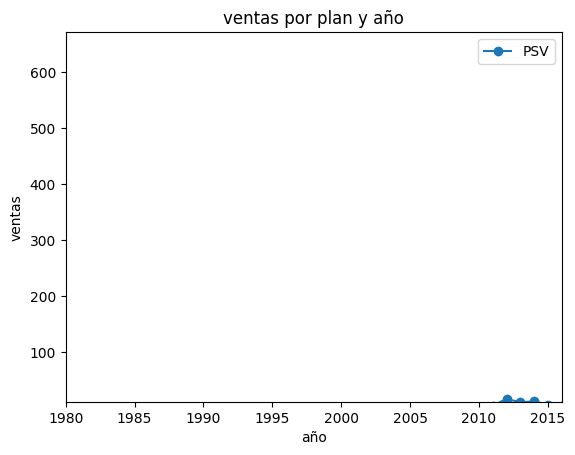

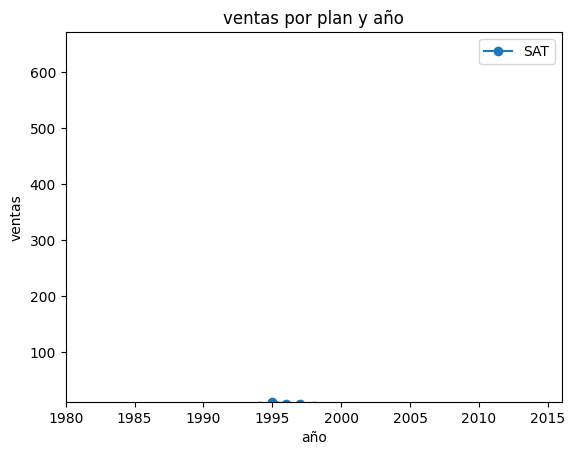

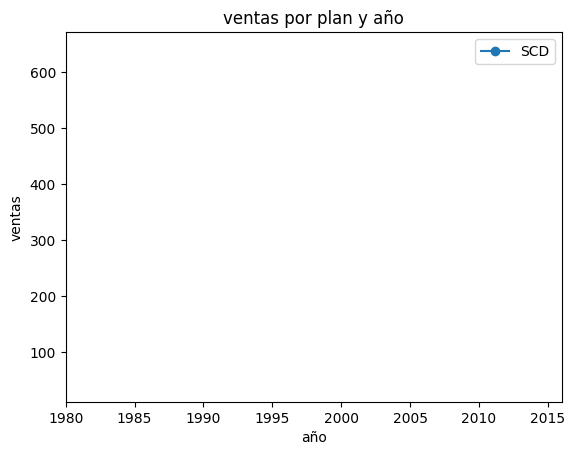

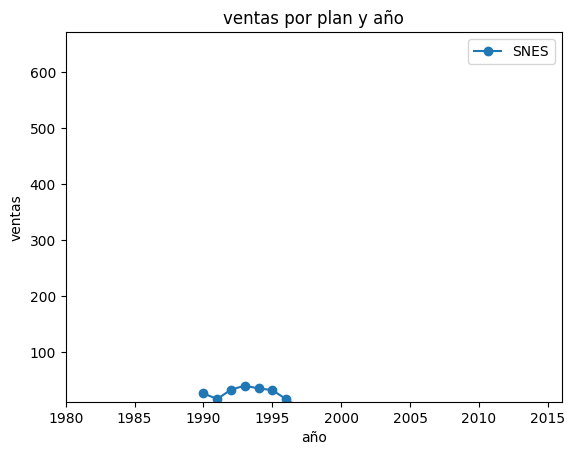

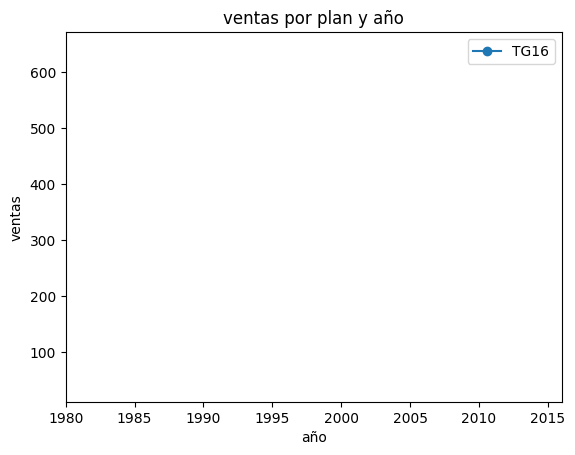

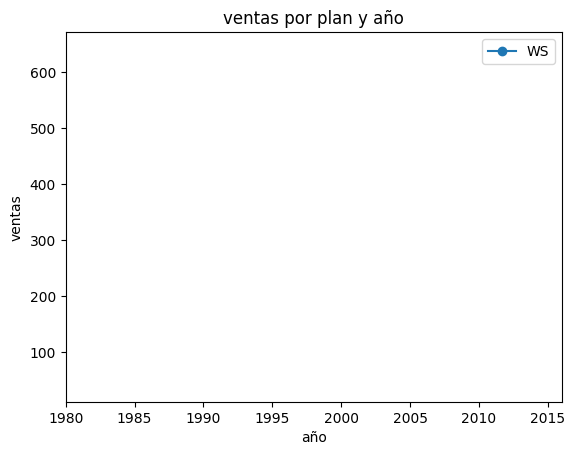

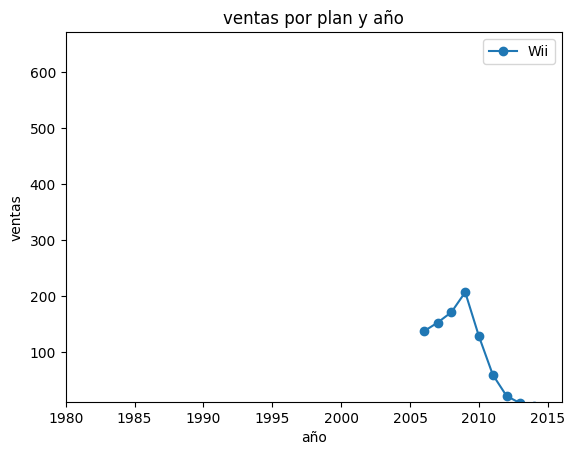

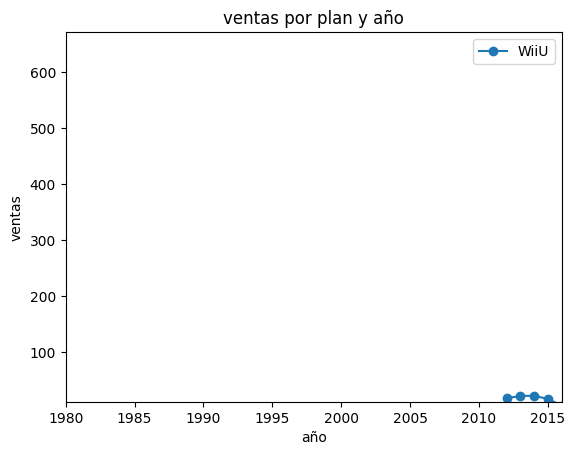

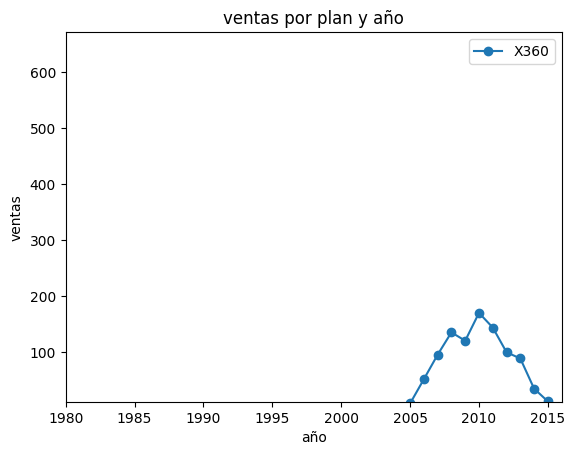

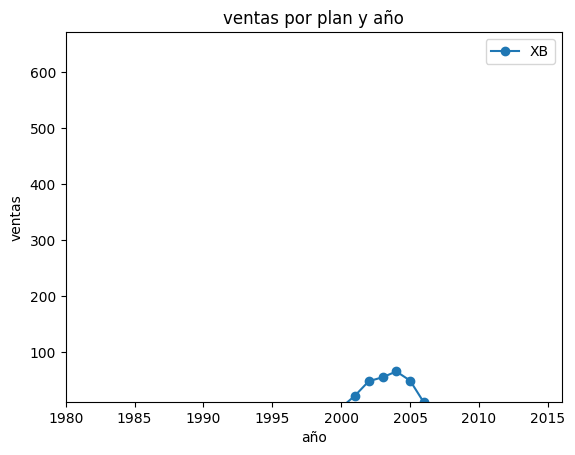

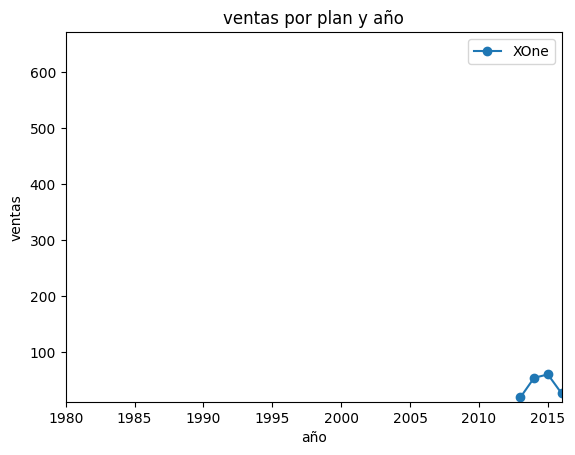

In [17]:
#ventas por año de cada consola
for platform in platform_sales_year['platform'].unique():
    ventas_año = platform_sales_year[platform_sales_year['platform']==platform]
    plt.plot(ventas_año['year_of_release'],ventas_año['total_sales'], label=platform, marker='o')
    plt.xlim(year['year_of_release'].min(), year['year_of_release'].max())
    plt.ylim(year['total_sales'].min(), year['total_sales'].max())
    plt.xlabel('año')
    plt.ylabel('ventas')
    plt.title('ventas por plan y año')
    plt.legend()
    plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

En este caso recomendaría cambiar el limitie del eje Y para que los datos puedan mostrarse de una mejor manera, otra manera que considero aún mejor es mostrar todas las plataformas en una misma gráfica, de esta manera se pueden comparar más fácil
</div>


In [18]:
#determiinar intervalo en el mercado por plataforma
df_intervalo = games_df.groupby('platform')['year_of_release'].agg(['min','max']).reset_index()
df_intervalo['años'] = df_intervalo['max'] - df_intervalo['min']
#consolas mas vendidas por año y las platafomras de ultima genreacion con intervalos de tiempo
df_intervalo[df_intervalo['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS','PS','XOne','WiiU','PS4'])]

,platform,min,max,años
4,DS,1985,2013,28
15,PS,1994,2003,9
16,PS2,2000,2011,11
17,PS3,2006,2016,10
18,PS4,2013,2016,3
26,Wii,2006,2016,10
27,WiiU,2012,2016,4
28,X360,2005,2016,11
30,XOne,2013,2016,3


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Gracias a la tabla podemos observar el tiempo de vida de cada una de las plataformas
</div>


la PS2 inicio en el 2000 y su ultima venta fue en el 2011 con una duracion de 11 años en el mercado y la PS inicio en el 1994 y salio del mercado en el año 2003 con 9 años 
los graficos nos muestra como algunas plataformas reducen sus ventas hasta desaparecer mientras que aparecen nuevas como, XONE, PS4, WiiU las cuales son las plataformas de nueva generacion con ello podemos determinar que existio un intervalo de 6 a 8 años para que saliera la plataforma de siguiente generacion y tardan 3 años aproximadamente en sacar del mercado la plataforma anterior

De aqui en adelante se tomaran los datos que empiezan del año 2005, al 2016 y los dados de las plataformas que es el ultimo año de los datos, tambien solo se tomaran en cuenta los datos de las plataformas X360,X0NE,WII,WIIU,PS3,PS4 y PC esto para tomar en cuenta la generacion mas moderna la cual es la que estara activa hasta el lanzamiento de la nueva plataforma y la anterior como referencia para futuros analisis

In [19]:
#datos filtrados
games_df_new = games_df[games_df['year_of_release']>=2005]
games_df_new = games_df_new[games_df_new['platform'].isin(['PC', 'X360', 'PS3', 'Wii','XOne','WiiU','PS4'])]

In [20]:
#NUEVO ventas por consola y año 
platform_sales_year = games_df_new.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
#NUEVO ventas por consola y año
year=platform_sales_year.groupby('year_of_release')['total_sales'].sum().reset_index()

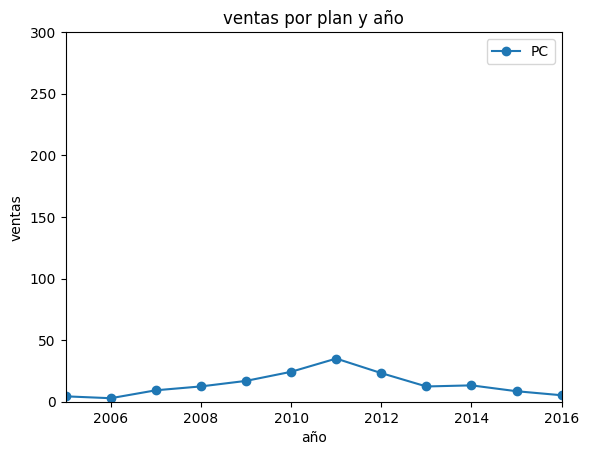

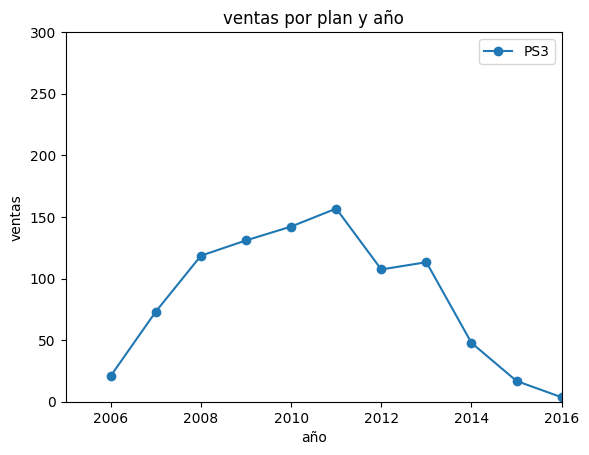

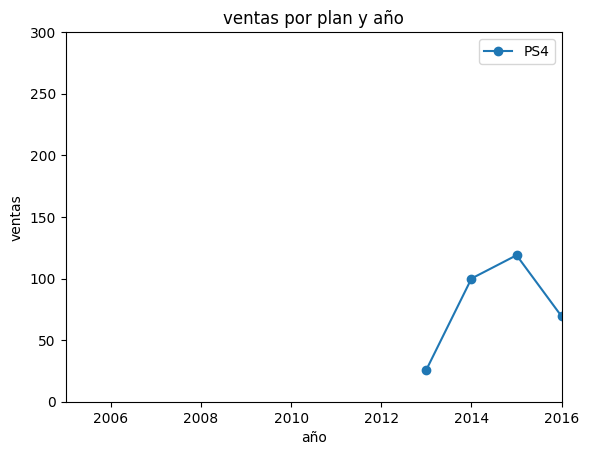

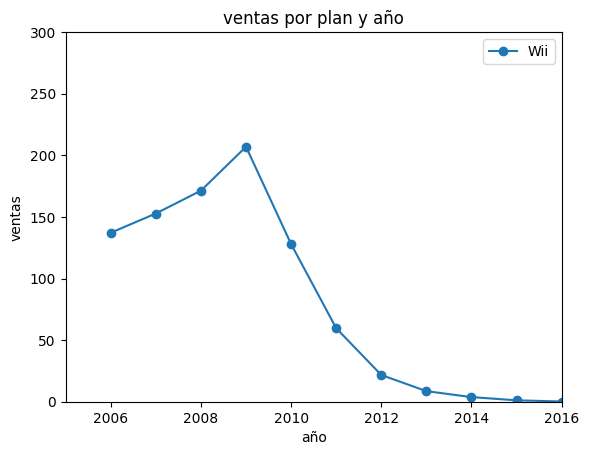

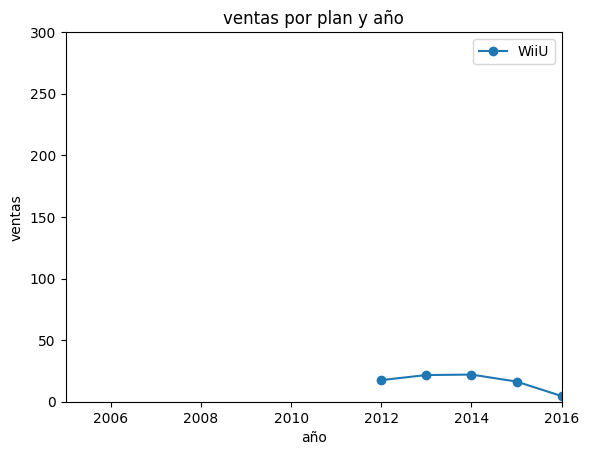

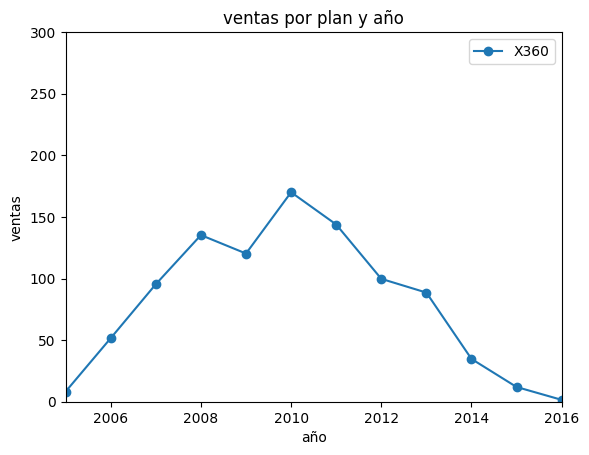

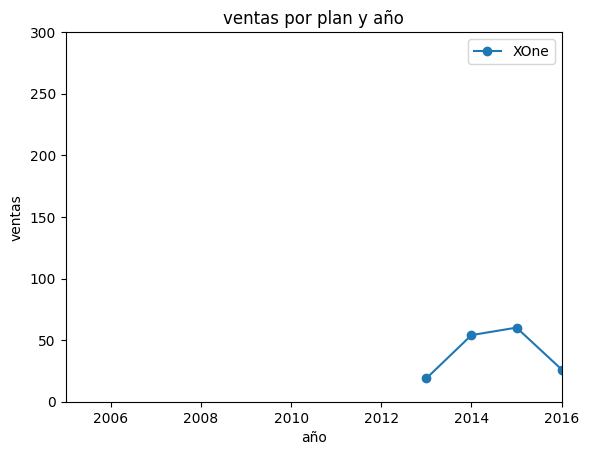

In [21]:
#Plataformas lideres en ventas
for platform in platform_sales_year['platform'].unique():
    ventas_año = platform_sales_year[platform_sales_year['platform']==platform]
    plt.plot(ventas_año['year_of_release'],ventas_año['total_sales'], label=platform, marker='o')
    plt.xlim(2005,2016)
    plt.ylim(0,300)
    plt.xlabel('año')
    plt.ylabel('ventas')
    plt.title('ventas por plan y año')
    plt.legend()
    plt.show()

considero que las plataformas con potencial pueden ser Xone, WiiU, PS4 debido a que estas plataforman llevan entre 4 y 5 años en el mercado por lo que podemos decir que les queda aproximadamente 2 años para que salga la plataforma de siguiente generacion y un aporximado de 3 años mas tras el lanzamiento de la siguiente plataforma, por lo qque podemos decir que le quedan alrededor de 5 años de vida aun a estas plataforma
de igual forma podriamos estar al tanto de PC, aunque tenga ventas bajas este mantiene unas ventas constantes

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

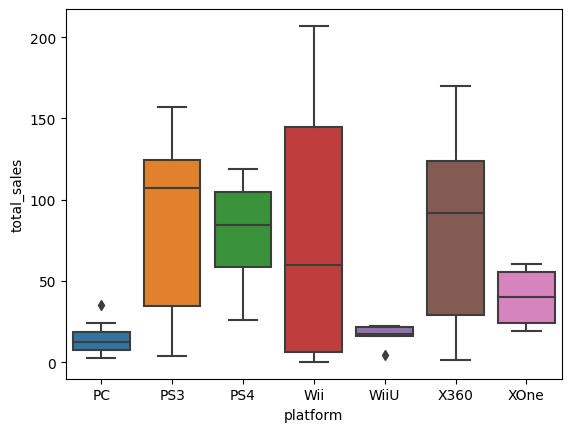

In [22]:
#boxplot, ventas por año de cada consola
sns.boxplot(data=platform_sales_year,x='platform',y='total_sales')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

El diagrama de caja nos muestra como en algunas plataformas las ventas estan consolidadas mientras que en otras consolas las ventas son muy disparejas lo que incrementa el rango intercuartil
</div>


podemos observar que las plataformas de nueva genreacion tienen ventas bajas a comparacion de las antiguas esto puede deberse a que las antiguas ya cumplieron su tiempo de vida estimado, ya llegaron a su punto maximo y ahora se encuentran por desaparecer del mercado mientras que las plataformas nuevas aun se enceuntran a mitad de ese proceso, podemos obsevar que de las nuevas plataformas PS4 el 50% de las ventas por año se encuentran encima de 90 millones
se puede observar que WiiU no esta desempeñandose como se esperaba, teniendo las ventas mas bajas dentro de las consolas con potencial

In [23]:
#Filtrado de valores con reseñas se almacenan las filas que contengan valores en las reseñas
games_df_score = games_df_new[games_df_new['critic_score'] != 999]
games_df_score = games_df_score[games_df_score['user_score'] != 999]

In [24]:
#promedio de reseñas
games_df_score['general_score'] = ((games_df_score['critic_score'] + (games_df_score['user_score']*10))/2)

In [25]:
#agrupacion por juego y plataforma con suma de ventas
gsales_by_plat = games_df_score.groupby(['name','platform'])['total_sales'].sum().reset_index()

In [26]:
#agrupacion por juego y plataforma con promedio de reseña
gscore_by_plat = games_df_score.groupby(['name','platform'])['general_score'].mean().reset_index()

In [27]:
#merge de df
merge_df = pd.merge(gsales_by_plat,gscore_by_plat,on=['name','platform'])
#Correlacion entre reseñas y ventas
correlacion = merge_df['total_sales'].corr(merge_df['general_score'])
print(f"la correlacion entre las ventas totales y el promedio de las reseñas fue de {correlacion}")

la correlacion entre las ventas totales y el promedio de las reseñas fue de 0.16412169880447716


In [28]:
#correlacion de la plataforma PS4
ps4_df = merge_df[merge_df['platform']== 'PS4']
correlacion = ps4_df['total_sales'].corr(ps4_df['general_score'])
print(f"la correlacion entre las ventas totales y el promedio de las reseñas para la plataforma PS4 fue de {correlacion}")

la correlacion entre las ventas totales y el promedio de las reseñas para la plataforma PS4 fue de 0.19053242815714277


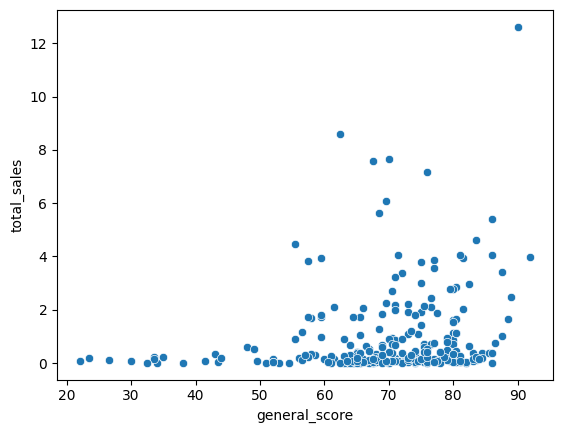

In [29]:
sns.scatterplot(x='general_score',y='total_sales',data=ps4_df)
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Hacer un score general me parece bueno como una tercera opción, pero considero que es importante revisar el score de los usuarios y de los criticos por separado para ver que tanto difieren
</div>


existe una correlacion positiva debil por lo que podemos decir que afecta levemente las reseñas de los juegos a las ventas, esto lo podemos seguir observando en en la grafica de dispersion donde podemos observar que donde hay una puntuacion mayor a 60 empiezan a presentarse puntos con ventas mas elevadas sin embargo aun podemos encontrar la gran mayoria de los juegos se encuentran debajo del millon de ventas y muy pocos logran superar la marca

In [30]:
#juego con mayor venta que seran la referencia para la comparacion (Grand Theft Auto V)
top_games = merge_df.groupby('name')['total_sales'].sum().reset_index()
top_games.sort_values(by='total_sales',ascending=False)

,name,total_sales
2072,Wii Sports,82.54
739,Grand Theft Auto V,56.58
1033,Mario Kart Wii,35.52
2074,Wii Sports Resort,32.77
264,Call of Duty: Modern Warfare 3,30.60
...,...,...
224,Breach,0.01
1041,Mario vs. Donkey Kong: Tipping Stars,0.01
1018,Majesty 2 Collection,0.01
2036,War for the Overworld,0.01


In [31]:
#df con los datos por plataforma de GTA
gta_df=merge_df[merge_df['name'] == 'Grand Theft Auto V']

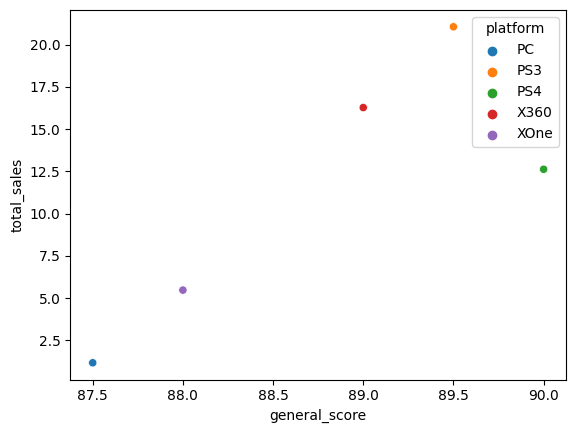

In [32]:
#GRAFICO
sns.scatterplot(x='general_score',y='total_sales',hue='platform',data=gta_df)
plt.show()

pdemos observar que conforme aumenta la calificacion hay mayores ganancias sin embargo las plataformas que estan en mejor ventas son aquellas plataformas que ya llegarn al limite de su tiempo de vida, podemos observar que de las plataformas de nueva generacion tanto en calificaion como en ventas PS4 es la que se enceuntra en una mejor posicion

In [33]:
#Ganancias por genero
games_df_genre = games_df_score.groupby('genre')['total_sales']

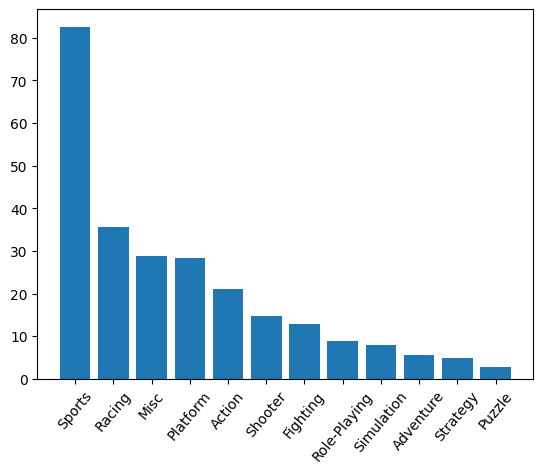

In [34]:
plt.bar(games_df_score['genre'],games_df_score['total_sales'])
plt.xticks(rotation=50)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buena manera de presentar los datos, podemos ver claramente cuales son los géneros preferidos de las personas, las observaciones que haces me parecen buenas también
</div>


Podemos observar que el genero mas rentable es deportes con ventas alrededor de 80 millones en total, seguido por juegos de carrera y misc que se refiere a juegos sin categoria, estos rondan en los 35 millones y los generos menos rentables son los de aventura, estrategia y puzzles con menos de 10 millones

In [36]:
#NA best platforms
plat_na = games_df_new.groupby('platform')['na_sales'].sum().reset_index()
plat_na.sort_values(by='na_sales',ascending=False)

,platform,na_sales
5,X360,595.74
3,Wii,486.87
1,PS3,390.13
2,PS4,108.74
6,XOne,93.12
0,PC,45.84
4,WiiU,38.10


In [37]:
#UE best platforms
plat_eu = games_df_new.groupby('platform')['eu_sales'].sum().reset_index()
plat_eu.sort_values(by='eu_sales',ascending=False)

,platform,eu_sales
1,PS3,327.21
5,X360,268.32
3,Wii,258.32
2,PS4,141.09
0,PC,103.01
6,XOne,51.59
4,WiiU,25.13


In [38]:
#JP best platforms
plat_jp = games_df_new.groupby('platform')['jp_sales'].sum().reset_index()
plat_jp.sort_values(by='jp_sales',ascending=False)

,platform,jp_sales
1,PS3,79.41
3,Wii,68.28
2,PS4,15.96
4,WiiU,13.01
5,X360,12.30
6,XOne,0.34
0,PC,0.00


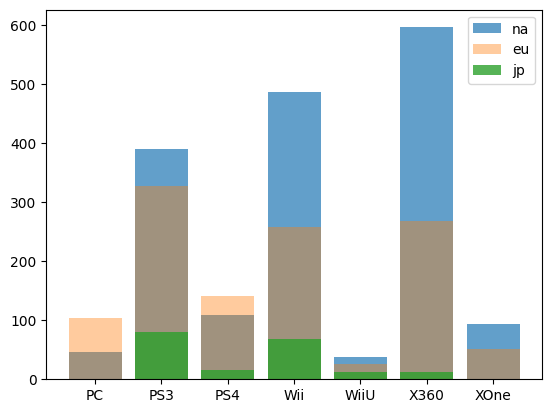

In [39]:
plt.bar(plat_na['platform'],plat_na['na_sales'],alpha=0.7,label='na')
plt.bar(plat_eu['platform'],plat_eu['eu_sales'],alpha=0.4,label='eu')
plt.bar(plat_jp['platform'],plat_jp['jp_sales'],alpha=0.8,label='jp')
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Esta grafica nos cuenta cosas muy interesantes, Europa y Norteamerica con comportamientos algo similares mientras que Japón con una tendencia diferente en las ventas
</div>


podemos observar que ps3, Wii y X360 son las plataformas mas populares sin embargo como ya se habia mencionado estas plataformas estan por conluir su tiempo de vida, con lo que podemos decir que llevan en el marcado mucho mas tiempo
de las plataformas de nueva generacion podemos observar que la ps4 es la que cuenta con mayor ventas, siguiendo por el Xone 
en Jp la plataforma mas popular es PS3 y Wii al momento
en eu la ps3 y X360
en na es x360 y wii

In [40]:
#NA best genres
genre_na = games_df_new.groupby('genre')['na_sales'].sum().reset_index()
genre_na.sort_values(by='na_sales',ascending=False).head(5)

,genre,na_sales
0,Action,394.60
8,Shooter,352.89
10,Sports,334.75
3,Misc,213.82
7,Role-Playing,112.66


In [41]:
#UE best genre
genre_eu = games_df_new.groupby('genre')['eu_sales'].sum().reset_index()
genre_eu.sort_values(by='eu_sales',ascending=False).head(5)

,genre,eu_sales
0,Action,284.74
8,Shooter,230.62
10,Sports,218.66
3,Misc,108.06
6,Racing,93.94


In [42]:
#JP best genre
genre_jp = games_df_new.groupby('genre')['jp_sales'].sum().reset_index()
genre_jp.sort_values(by='jp_sales',ascending=False).head(5)

,genre,jp_sales
0,Action,43.52
7,Role-Playing,29.48
10,Sports,28.14
3,Misc,18.44
8,Shooter,16.98


pdemos observar que en EU y NA tienen casi los mismos generos en el mismo orden, de los 5 generos mas populares solo cambia el 5to lugar donde en NA encontramos Role-Playing y en Eu Racing
en JP se mantiene el genero mas popular sin embargo los siguientes lugares son los mismos generos en diferente orden

In [43]:
#Datos filtrado de datos que no tienen "tbd"
games_df_new_rating = games_df_new[games_df_new['rating'] != 'tbd']

In [44]:
#clasificacion en NA
rating_na = games_df_new_rating.groupby('rating')['na_sales'].sum().reset_index()
rating_na.sort_values(by='na_sales',ascending=False).head(5)

,rating,na_sales
3,M,546.34
0,E,509.12
5,T,335.76
1,E10+,217.36
2,EC,0.71


In [45]:
#clasificacion en EU
rating_eu = games_df_new_rating.groupby('rating')['eu_sales'].sum().reset_index()
rating_eu.sort_values(by='eu_sales',ascending=False).head(5)

,rating,eu_sales
3,M,385.38
0,E,326.41
5,T,200.41
1,E10+,124.09
4,RP,0.03


In [46]:
#clasificacion en JP
rating_jp = games_df_new_rating.groupby('rating')['jp_sales'].sum().reset_index()
rating_jp.sort_values(by='jp_sales',ascending=False).head(5)

,rating,jp_sales
0,E,56.67
5,T,40.38
3,M,36.19
1,E10+,8.71
2,EC,0.00


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Las agrupaciones que haces me parecen correctas, recomendaría complementar las tablas con gráficas de la misma manera en que se hizo anteriormente
</div>


Podemos observar que NA y EU comparten tendencias ya que tanto en los ratings como en los generos los 4 mas demandados ocupan los mismos luagres, mientras que japon tiende a tener tendenias similares donde encontramos los mismos ratings sin embargo en diferente orden

In [47]:
games_df_score = games_df_new[games_df_new['critic_score'] != 999]
games_df_score = games_df_score[games_df_score['user_score'] != 999]

In [48]:
#calificacion promedio de los usuarios en Xbox One
score_xbox = games_df_score[games_df_score['platform'] == 'XOne']
score_xbox_mean = score_xbox['user_score'].mean()
print(score_xbox_mean)

6.512903225806452


In [49]:
#calificacion promedio de los usuarios en PC
score_pc = games_df_score[games_df_score['platform']=='PC']
score_pc_mean = score_pc['user_score'].mean()
print(score_pc_mean)

6.88759571209801


In [51]:
# Las calificaciones promedio de los usuarios es la misma entere xbox y pc
estadistico, p_value = st.ttest_1samp(score_xbox['user_score'],score_pc_mean)

alpha = 0.05
if p_value < alpha:
    print('rechazo la hipotesis nula')
else:
    print('no se puede rechazar la hipotesi nula')

rechazo la hipotesis nula


In [52]:
#calificaciones promedio de Deportes
games_df_score_sport = games_df_score[games_df_score['genre']=='Sports']
games_df_score_sport_mean = games_df_score_sport['user_score'].mean()
print(games_df_score_sport_mean)

6.161319073083779


In [53]:
#Calificaciones Promedio de action
games_df_score_action = games_df_score[games_df_score['genre']=='Action']
games_df_score_action_mean = games_df_score_action['user_score'].mean()
print(games_df_score_action_mean)

6.823138033763654


In [55]:
#calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes
estadistico, p_value = st.ttest_1samp(games_df_score_sport['user_score'],games_df_score_action_mean)

alpha = 0.05
if p_value > alpha:
    print('rechazo la hipotesis nula')
else:
    print('no se puede rechazar la hipotesi nula')

no se puede rechazar la hipotesi nula


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />


El planteamiento de la hipótesis me parece correcto en ambos casos, bien hecho!
</div>


En conclusion se pudo determinar pltafaromas con potencial economoco al igual que las tendencias de juegos para cada region esto es de suma importancia ya que nos permite determinar la mejor accion o mejores inversiones para cada plataforma o region, al igual que nos permite planificar desarrollo de videojuegos con una estimacion del desempeño de los productos a desarollar

observamos que el rating con mayores ventas es M siendo en EU Y NA el mas vendido y en JP el 3ro
se encontro que el genero de accion es el mas popular en todas las regiones
que de las plataformas de nueva generacion Xone y PS4 son las mas rentables y aun pueden tener alredor de 5 años mas en el mercado 

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, las observaciones que has hecho durante todo el ejercicio me han parecido bastante buenas, son un gran apoyo a la hora de revisar el proyecto ya que me dan a entender que el tema te ha quedado claro y has podido avanzar correctamente.

    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen buenas
    
</div>

<div class="alert alert-block alert-warning">
<b>Aspectos que pueden mejorar del proyecto</b> <a class="tocSkip"></a><br />

- Se pueden incluir más graficas para resaltar las observaciones o datos que muestras, especialmente en la parte donde se comparan las distintas regiones del mundo

</div>


